# Eternal Card Extractor Screenshot Calibration Aide

## Make sure you have the required python 3 modules
This script was built on Python 3.x and uses pyautogui and opencv 3.4.2. I think the rest of the default Python 3 modules are safe. If the cells below throw errors, you may have problems.

In [1]:
import sys
assert sys.version[0]=='3'

In [2]:
import cv2
assert cv2.__version__=='3.4.2'
    # cv2 versions above 3.4.2 do not seem to have xfeatures2d.SIFT methods directly available.
    # When in doubt, force the installation of version 3.4.2.16. I used
    #   pip3 install --user opencv-python==3.4.2.16
    #   pip3 install --user opencv-contrib-python==3.4.2.16
    # Both opencv-python and open-contrib-python seemed to be needed for SIFT to work.
    # This section does not really do any SIFTing, so probalby any version of cv2 is ok.

## Calibration guidelines

In [3]:
import pyautogui
import cv2
from matplotlib import pyplot as plt

In [115]:
413/pyautogui.size()[1]

0.3824074074074074

In [85]:
0.2130*pyautogui.size()[0]

408.96

In [150]:
img_w,img_h=int(0.0479*pyautogui.size()[0]),int(0.1130*pyautogui.size()[1])

sep_x,sep_y=int(0.1218*pyautogui.size()[0]),int(0.3852*pyautogui.size()[1])
sep_cnt=int(0.013*pyautogui.size()[0])

crd_x,crd_y=int(0.1730*pyautogui.size()[0]),int(0.2120*pyautogui.size()[1])
pos_lst=[ (crd_x+n_x*sep_x,crd_y+n_y*sep_y,img_w,img_h)
          for n_y in range(2) for n_x in range(6)]

cnt_x,cnt_y=int(0.1917*pyautogui.size()[0]),int(0.1463*pyautogui.size()[1])
cnt_lst=[ [(cnt_x+n_x*sep_x+n_cnt*sep_cnt,cnt_y+n_y*sep_y) for n_cnt in range(3)]
          for n_y in range(2) for n_x in range(6)]

blurring_kernel=(5,5)

This is the card artwork and the downsampled section that I grabbed features from

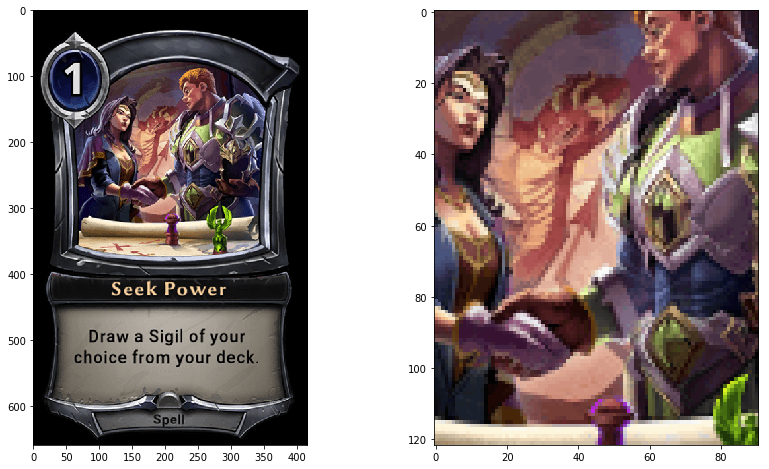

In [90]:
fig=plt.figure(figsize=(14,8))

img=cv2.imread('./ZZZ_Samples/Seek_Power.png')
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

l,t,w,h=120,113,166,220
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(cv2.resize(img[t:t+h,l:l+w],(img_w,img_h)),cv2.COLOR_BGR2RGB))

plt.show()

The feature extraction section is much sharper than the one taken from the screenshots, and blurring it a bit helps with the identification.

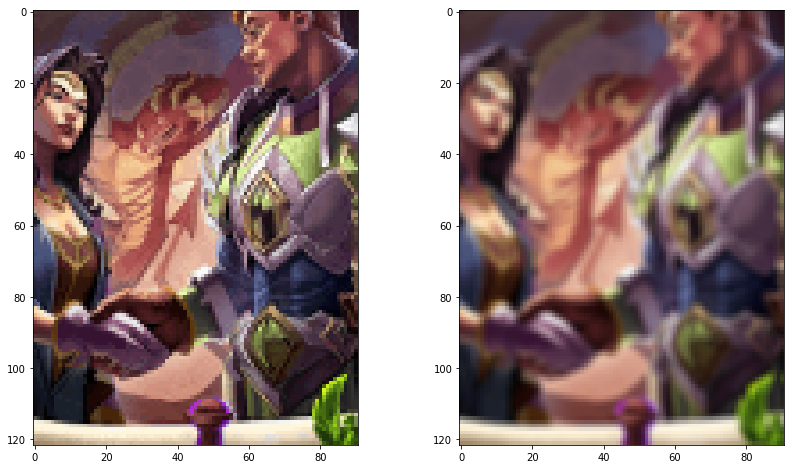

In [154]:
fig=plt.figure(figsize=(14,8))

img=cv2.imread('./ZZZ_Samples/Seek_Power.png')
l,t,w,h=120,113,166,220
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(cv2.resize(img[t:t+h,l:l+w],(img_w,img_h)),cv2.COLOR_BGR2RGB))

img=cv2.blur(cv2.imread('./ZZZ_Samples/Seek_Power.png'),blurring_kernel)
fig.add_subplot(1,2,2)
l,t,w,h=120,113,166,220
plt.imshow(cv2.cvtColor(cv2.resize(img[t:t+h,l:l+w],(img_w,img_h)),cv2.COLOR_BGR2RGB))

plt.show()

This is our screenshot (technically, my screenshot) and the section we extract features from

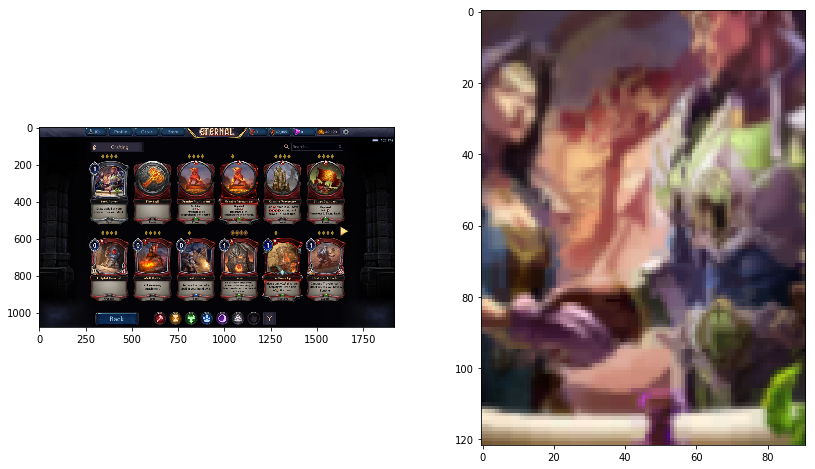

In [91]:
fig=plt.figure(figsize=(14,8))

img=cv2.imread('./ZZZ_Samples/ss001.png')
fig.add_subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

l,t,w,h=pos_lst[0]
fig.add_subplot(1,2,2)
plt.imshow(cv2.cvtColor(img[t:t+h,l:l+w],cv2.COLOR_BGR2RGB))

plt.show()

Finally, here is a direct comparison between the three (original card, blurred card, and card extracted from the screenshot) for the first and last cards of the screenshot:

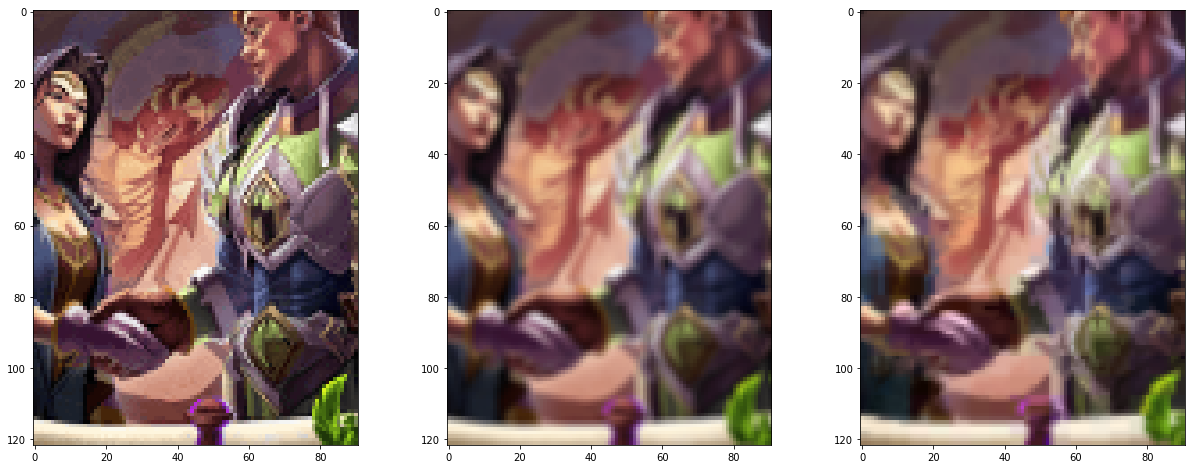

In [155]:
fig=plt.figure(figsize=(21,8))

img=cv2.imread('./ZZZ_Samples/Seek_Power.png')
fig.add_subplot(1,3,1)
l,t,w,h=120,113,166,220
plt.imshow(cv2.cvtColor(cv2.resize(img[t:t+h,l:l+w],(img_w,img_h)),cv2.COLOR_BGR2RGB))

img=cv2.blur(cv2.imread('./ZZZ_Samples/Seek_Power.png'),blurring_kernel)
fig.add_subplot(1,3,2)
l,t,w,h=120,113,166,220
plt.imshow(cv2.cvtColor(cv2.resize(img[t:t+h,l:l+w],(img_w,img_h)),cv2.COLOR_BGR2RGB))

img=cv2.imread('./ZZZ_Samples/ss001.png')
fig.add_subplot(1,3,3)
l,t,w,h=pos_lst[0]
plt.imshow(cv2.cvtColor(img[t:t+h,l:l+w],cv2.COLOR_BGR2RGB))

plt.show()

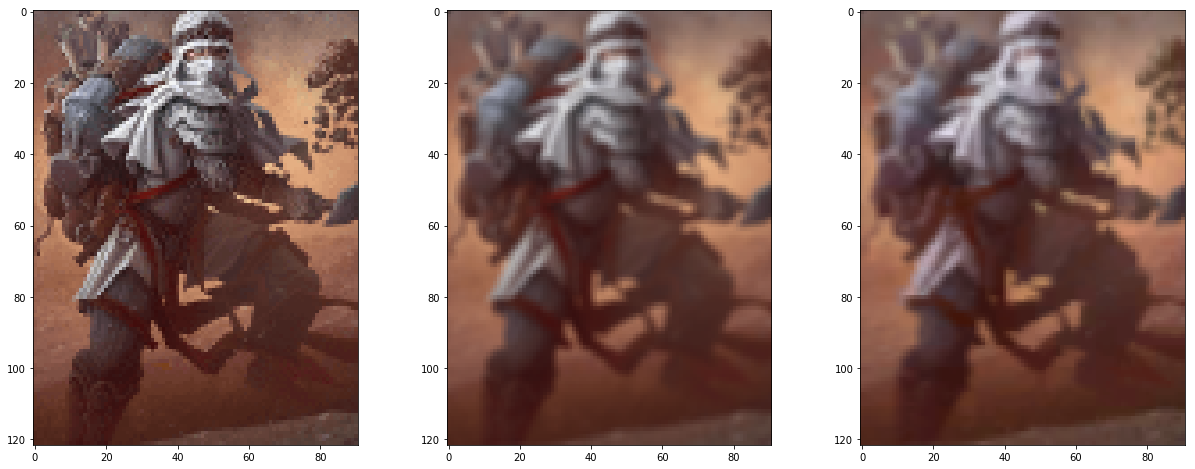

In [157]:
fig=plt.figure(figsize=(21,8))

img=cv2.imread('./ZZZ_Samples/Cautious_Traveler.png')
fig.add_subplot(1,3,1)
l,t,w,h=120,113,166,220
plt.imshow(cv2.cvtColor(cv2.resize(img[t:t+h,l:l+w],(img_w,img_h)),cv2.COLOR_BGR2RGB))

img=cv2.blur(cv2.imread('./ZZZ_Samples/Cautious_Traveler.png'),blurring_kernel)
fig.add_subplot(1,3,2)
l,t,w,h=120,113,166,220
plt.imshow(cv2.cvtColor(cv2.resize(img[t:t+h,l:l+w],(img_w,img_h)),cv2.COLOR_BGR2RGB))

img=cv2.imread('./ZZZ_Samples/ss001.png')
fig.add_subplot(1,3,3)
l,t,w,h=pos_lst[11]
plt.imshow(cv2.cvtColor(img[t:t+h,l:l+w],cv2.COLOR_BGR2RGB))

plt.show()

The right areas need to be grabbed from both the artwork and the screenshots in order for the method to work. They do not need to be exactly the same, but the closer the better; also, if one includes a section of something very intrusive (like the card frame) and the other does not, the chances of success decrease some.

Note that in the screenshot, all 12 areas need to be extracted reliably.

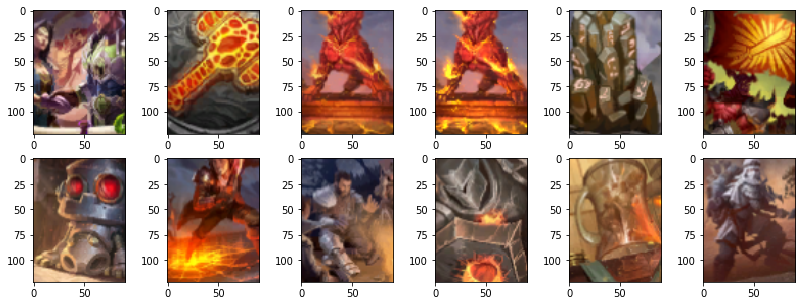

In [137]:
fig=plt.figure(figsize=(14,5))

img=cv2.imread('./ZZZ_Samples/ss001.png')
for i in range(12):
    fig.add_subplot(2,6,i+1)
    l,t,w,h=pos_lst[i]
    plt.imshow(cv2.cvtColor(img[t:t+h,l:l+w],cv2.COLOR_BGR2RGB))
plt.show()

Similar comments can be made about the ownership diamonds.

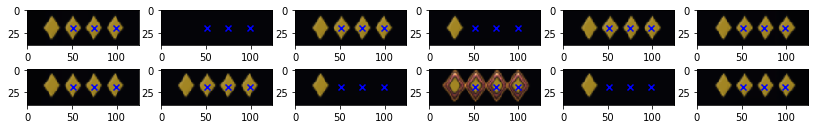

In [141]:
fig=plt.figure(figsize=(14,2))

box_dl,box_dt=1,1
bow_w,box_h=1,1

img=cv2.imread('./ZZZ_Samples/ss001.png')
for i in range(12):
    fig.add_subplot(2,6,i+1)
    l,t,_,_=pos_lst[i]
    l,t,w,h=l-15,t-90,125,40
    plt.imshow(cv2.cvtColor(img[t:t+h,l:l+w],cv2.COLOR_BGR2RGB))
    for p in cnt_lst[i]:
        plt.scatter(p[0]-l,p[1]-t,color='b',marker='x')
plt.show()

A diamond will give sum values of ~330, whereas a non diamond will give ~15.

In [136]:
img=cv2.imread('./ZZZ_Samples/ss001.png')
for i in range(2):
    out=''
    for j in range(6):
        val=[]
        for p in cnt_lst[i*6+j]:
            val.append('{:3d}'.format(img[p[1],p[0],:].sum()))
        out=out+'[{}] '.format(', '.join(val))
    print(out)

[330, 330, 330] [ 16,  16,  16] [330, 330, 330] [ 16,  16,  16] [330, 330, 330] [330, 330, 330] 
[329, 328, 328] [330, 329, 329] [ 16,  16,  16] [330, 330, 330] [ 16,  16,  16] [330, 330, 330] 
